# Appendix B: Geopandas Plot
__Source: http://www.diva-gis.org/datadown__

In [106]:
import requests
import re
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from requests.exceptions import HTTPError

In [96]:
gdf = gpd.read_file("DEU_adm1.shp", encoding="utf-8")
grouped_df=pd.read_csv("grouped.csv")

__Clean Geo-DataFrame__

In [101]:
def clean_and_merge(dataframe_geodata):
    dropped=dataframe_geodata.drop(["ID_0","ISO","NAME_0","ID_1","TYPE_1","ENGTYPE_1","NL_NAME_1","VARNAME_1"], axis=1)
    dropped["NAME_1"]=[re.sub("ü","ue",element) for element in dropped["NAME_1"]]
    dropped.rename(columns={"NAME_1": "state"}, inplace=True)
    merged_df=pd.merge(grouped_df, dropped,how="inner",on="state")
    return merged_df

In [105]:
merged_df=clean_and_merge(gdf)

__Plot DataFrame as geopandas plot__

In [110]:
def plot_geodata():
    geo=gpd.GeoDataFrame(merged_df)
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    geo.plot(column='2017', ax=ax, legend=True, cmap='Reds', edgecolor="firebrick")
    plt.axis("off")
    plt.savefig("geo.pdf")

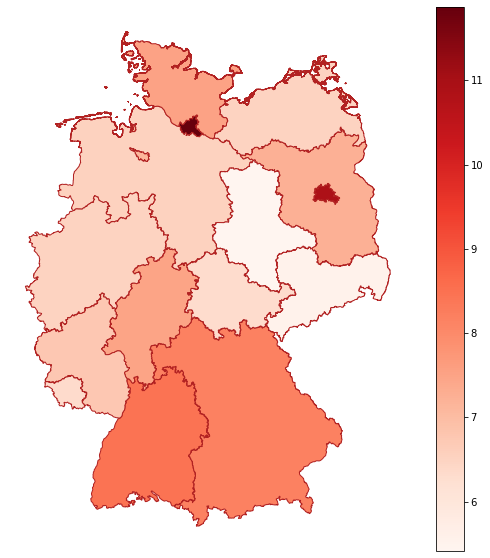

In [111]:
plot_geodata()